# Importing Necessary Libbaries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Dataset

## Load Dataset

In [125]:
df = pd.read_csv('lung_cancer_dataset.csv')

In [126]:
df.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


In [127]:
df.columns

Index(['patient_id', 'age', 'gender', 'pack_years', 'radon_exposure',
       'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis',
       'alcohol_consumption', 'family_history', 'lung_cancer'],
      dtype='object')

In [128]:
df.dtypes

,0
patient_id,int64
age,int64
gender,object
pack_years,float64
radon_exposure,object
asbestos_exposure,object
secondhand_smoke_exposure,object
copd_diagnosis,object
alcohol_consumption,object
family_history,object


In [129]:
df.isnull().sum()

,0
patient_id,0
age,0
gender,0
pack_years,0
radon_exposure,0
asbestos_exposure,0
secondhand_smoke_exposure,0
copd_diagnosis,0
alcohol_consumption,16662
family_history,0


In [130]:
df.nunique()

,0
patient_id,50000
age,83
gender,2
pack_years,50000
radon_exposure,3
asbestos_exposure,2
secondhand_smoke_exposure,2
copd_diagnosis,2
alcohol_consumption,2
family_history,2


In [131]:
unique_check = {"Gender": df["gender"].unique(), "radon_exposure": df["radon_exposure"].unique(), "Asbestos Exposure": df["asbestos_exposure"].unique(),
                "secondhand_smoke_exposure": df["secondhand_smoke_exposure"].unique(), "copd_diagnosis": df["copd_diagnosis"].unique(),
                "alcohol_consumption": df["alcohol_consumption"].unique(), "family_history": df["family_history"].unique(), "lung_cancer": df["lung_cancer"].unique()}

In [132]:
unique_check

{'Gender': array(['Male', 'Female'], dtype=object),
 'radon_exposure': array(['High', 'Medium', 'Low'], dtype=object),
 'Asbestos Exposure': array(['No', 'Yes'], dtype=object),
 'secondhand_smoke_exposure': array(['No', 'Yes'], dtype=object),
 'copd_diagnosis': array(['Yes', 'No'], dtype=object),
 'alcohol_consumption': array(['Moderate', nan, 'Heavy'], dtype=object),
 'family_history': array(['No', 'Yes'], dtype=object),
 'lung_cancer': array(['No', 'Yes'], dtype=object)}

## Encoding Values

In [133]:
df['gender'] = np.where(df['gender'] == "Male", 1, 0)
df['asbestos_exposure'] = np.where(df['asbestos_exposure'] == "Yes", 1, 0)
df["secondhand_smoke_exposure"] = np.where(df["secondhand_smoke_exposure"] == "Yes", 1, 0)
df["copd_diagnosis"] = np.where(df["copd_diagnosis"] == "Yes", 1, 0)
df["alcohol_consumption"] = np.where(df["alcohol_consumption"] == "Yes", 1, 0)
df["family_history"] = np.where(df["family_history"] == "Yes", 1, 0)
df["lung_cancer"] = np.where(df["lung_cancer"] == "Yes", 1, 0)

In [134]:
df['radon_exposure'] = np.where(df['radon_exposure'] == "High", 3, np.where(df['radon_exposure'] == "Medium", 2, 1))
df['alcohol_consumption'] = np.where(df['alcohol_consumption'] == "High", 3, np.where(df['alcohol_consumption'] == "Medium", 2, 1))

In [78]:
df.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,1,66.025244,3,0,0,1,1,0,0
1,100001,32,0,12.780800,3,0,1,1,1,1,1
2,100002,89,0,0.408278,2,1,1,1,1,0,1
3,100003,78,0,44.065232,1,0,1,0,1,0,1
4,100004,38,0,44.432440,2,1,0,1,1,1,1


## Data Visualization

### Histogram plot

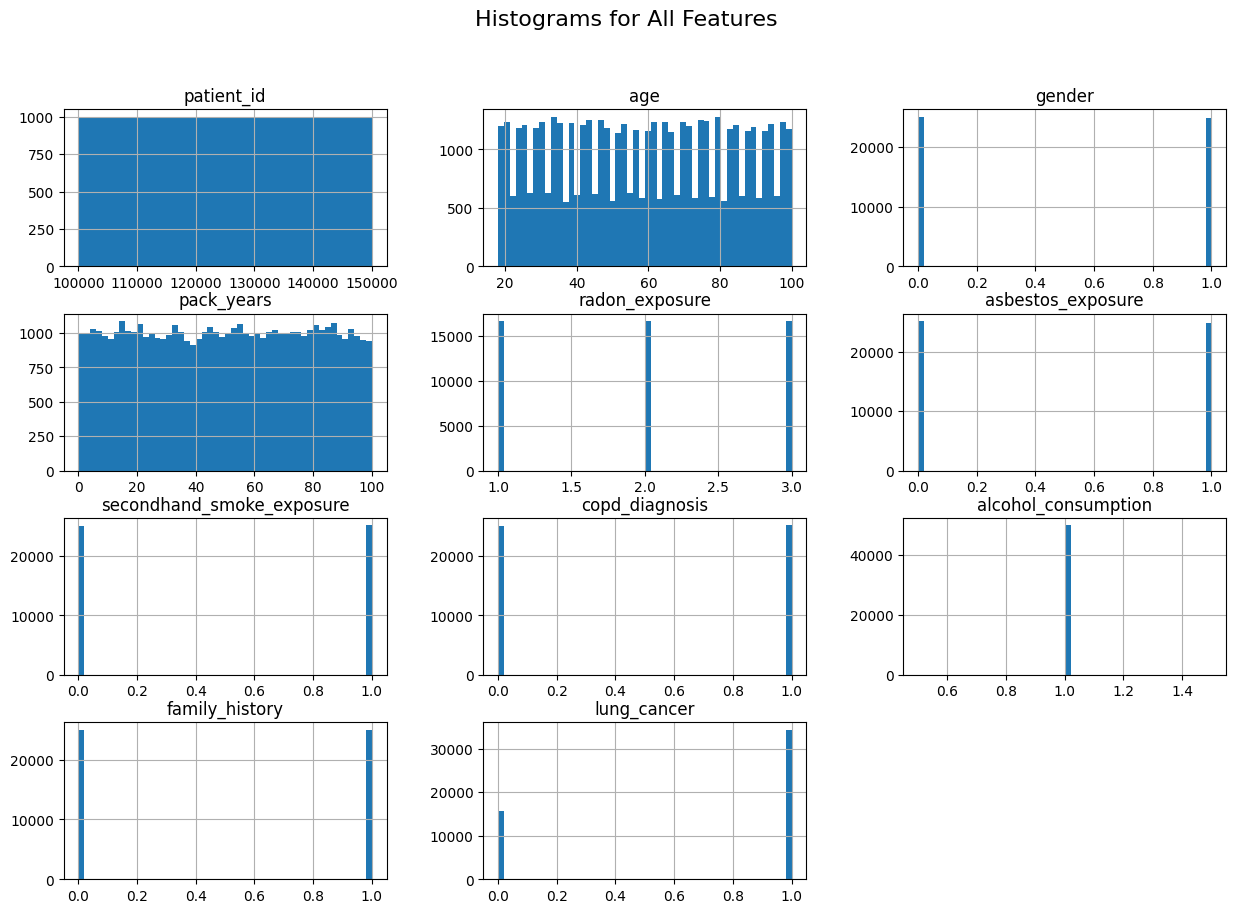

In [135]:
df.hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms for All Features', fontsize=16)
plt.show()

### BOX Plot

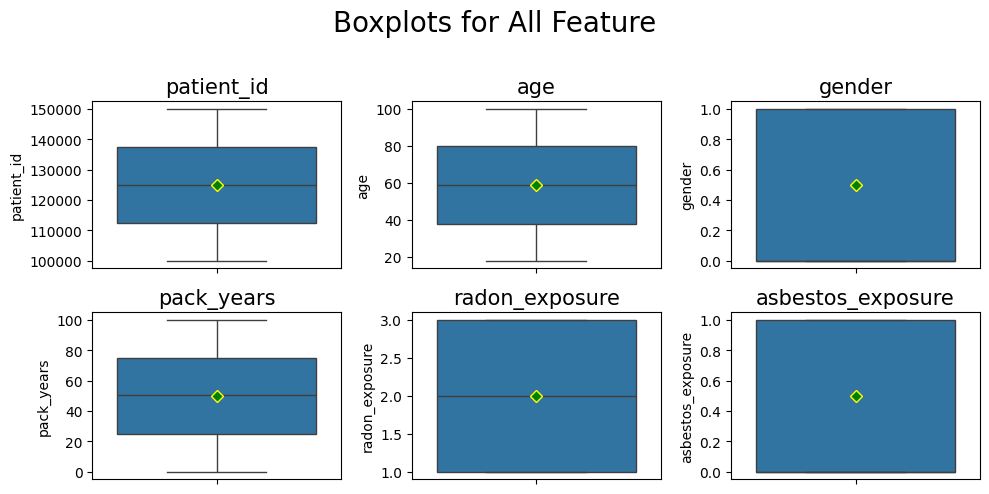

In [136]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
fig.suptitle("Boxplots for All Feature", size=20)

labels_list = list(df.columns)
idx = 0
red_circle = dict(markerfacecolor='red', marker='o')
green_diamond = dict(markerfacecolor='green', marker='D', markeredgecolor='yellow')

for i in range(2):
    for j in range(3):
        if idx < len(labels_list):
            sns.boxplot(ax=axes[i, j],
                        data=df[labels_list[idx]],
                        flierprops=red_circle,
                        showmeans=True,
                        meanprops=green_diamond)
            axes[i, j].set_title(labels_list[idx], fontsize=15)
            idx += 1
        else:
            axes[i, j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Data Heatmap

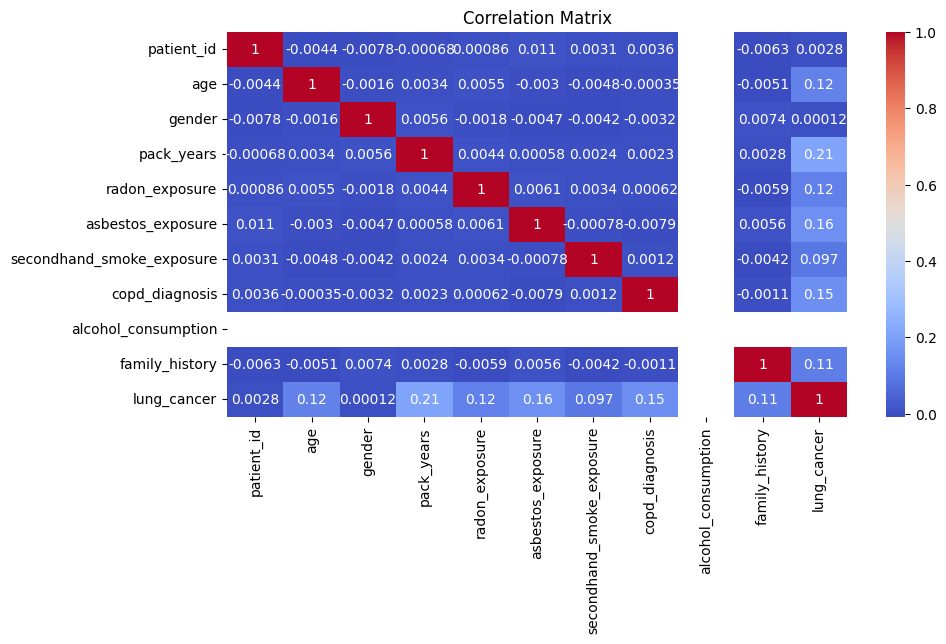

In [137]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Dropping Irrelevent Features

In [138]:
df = df.drop("patient_id", axis=1)
# df = df.drop("radon_exposure", axis=1)
df = df.drop("alcohol_consumption", axis=1)

In [140]:
df.head()

,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,family_history,lung_cancer
0,69,1,66.025244,3,0,0,1,0,0
1,32,0,12.780800,3,0,1,1,1,1
2,89,0,0.408278,2,1,1,1,0,1
3,78,0,44.065232,1,0,1,0,0,1
4,38,0,44.432440,2,1,0,1,1,1


# Model Build

## Train-Test Split

In [141]:
X = df.drop(columns=["lung_cancer"])
y = df["lung_cancer"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [142]:
class_percent = df['lung_cancer'].value_counts(normalize=True) * 100
print(class_percent)


lung_cancer
1    68.728
0    31.272
Name: proportion, dtype: float64


## Library Import

In [143]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
recall_value = {}
precision_value = {}
f1_value = {}
accuracy_ = {}

## Random Forest

### Model

In [145]:
# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

# Accuracy
accuracy2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy2:.2f}")

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Store in dictionaries
precision_value['RandomForest'] = precision
recall_value['RandomForest'] = recall
f1_value['RandomForest'] = f1
accuracy_['RandomForest'] = accuracy2
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.44      0.48      3127
           1       0.76      0.82      0.79      6873

    accuracy                           0.70     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.69      0.70      0.69     10000



### Confusion Matrix

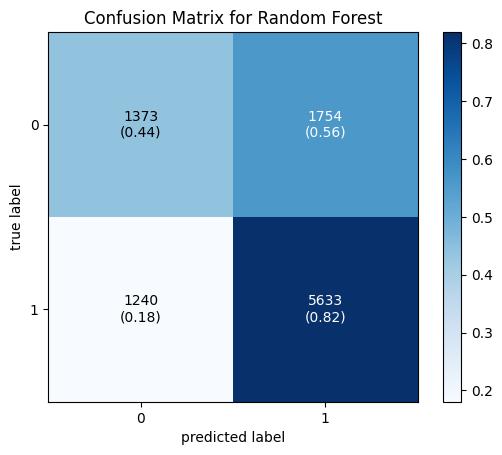

In [146]:
cnf_matrix_rf = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cnf_matrix_rf,
                      show_absolute=True, show_normed=True, colorbar=True)
plt.title('Confusion Matrix for Random Forest')
plt.show()


## MLP (Multilayer Perceptron)

### Preprocessing

In [147]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model

In [195]:
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp_model.fit(X_train_scaled, y_train, epochs=3, batch_size=64, verbose=1, validation_split=0.2)
y_pred_mlp = (mlp_model.predict(X_test_scaled) > 0.5).astype("int32")

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp, average='weighted')
recall = recall_score(y_test, y_pred_mlp, average='weighted')
f1 = f1_score(y_test, y_pred_mlp, average='weighted')

accuracy_['MLP'] = accuracy_mlp
precision_value['MLP'] = precision
recall_value['MLP'] = recall
f1_value['MLP'] = f1

print("Accuracy: ", accuracy_mlp)
print()
print("Classification Report for MLP:")
print(classification_report(y_test, y_pred_mlp))

Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6975 - loss: 0.5752 - val_accuracy: 0.7228 - val_loss: 0.5432
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7184 - loss: 0.5452 - val_accuracy: 0.7246 - val_loss: 0.5360
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7215 - loss: 0.5407 - val_accuracy: 0.7231 - val_loss: 0.5362
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy:  0.7321

Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.61      0.39      0.48      3127
           1       0.76      0.89      0.82      6873

    accuracy                           0.73     10000
   macro avg       0.69      0.64      0.65     10000
weighted avg       0.72      0.73      0.71     10000



### Confusion Matrix

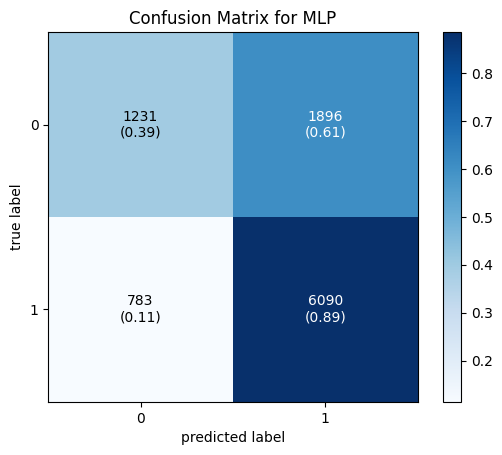

In [196]:
cnf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plot_confusion_matrix(conf_mat=cnf_matrix_mlp,
                      show_absolute=True, show_normed=True, colorbar=True)
plt.title('Confusion Matrix for MLP')
plt.show()


# CNN

## Model

In [209]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Conv1D(32, kernel_size=2, activation='relu'),
    tf.keras.layers.Conv1D(64, kernel_size=2, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_scaled, y_train, epochs=4, batch_size=128, verbose=1, validation_split=0.2)
y_pred_cnn = (cnn_model.predict(X_test_scaled) > 0.5).astype("int32")

accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision = precision_score(y_test, y_pred_cnn, average='weighted')
recall = recall_score(y_test, y_pred_cnn, average='weighted')
f1 = f1_score(y_test, y_pred_cnn, average='weighted')

accuracy_['CNN'] = accuracy_cnn
precision_value['CNN'] = precision
recall_value['CNN'] = recall
f1_value['CNN'] = f1

print("Accuracy: ", accuracy_cnn)
print()
print("Classification Report for CNN:")
print(classification_report(y_test, y_pred_cnn))


Epoch 1/4


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6725 - loss: 0.6066 - val_accuracy: 0.7065 - val_loss: 0.5676
Epoch 2/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7063 - loss: 0.5664 - val_accuracy: 0.7116 - val_loss: 0.5611
Epoch 3/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7075 - loss: 0.5618 - val_accuracy: 0.7175 - val_loss: 0.5576
Epoch 4/4
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7224 - loss: 0.5478 - val_accuracy: 0.7161 - val_loss: 0.5542
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy:  0.7316

Classification Report for CNN:
              precision    recall  f1-score   support

           0       0.63      0.34      0.44      3127
           1       0.75      0.91      0.82      6873

    accuracy                           0.73     10000
   macro avg       0.69      0.63      0.63     10000
weighted avg       0.71      0.73      0.70     10000



## Confusion Matrix

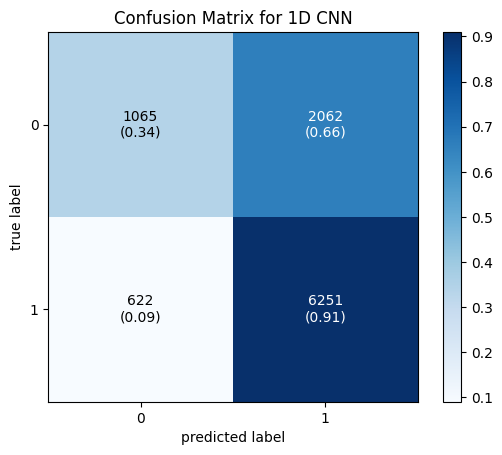

In [210]:
cnf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
plot_confusion_matrix(conf_mat=cnf_matrix_cnn,
                      show_absolute=True, show_normed=True, colorbar=True)
plt.title('Confusion Matrix for 1D CNN')
plt.show()

# Result Alanysis

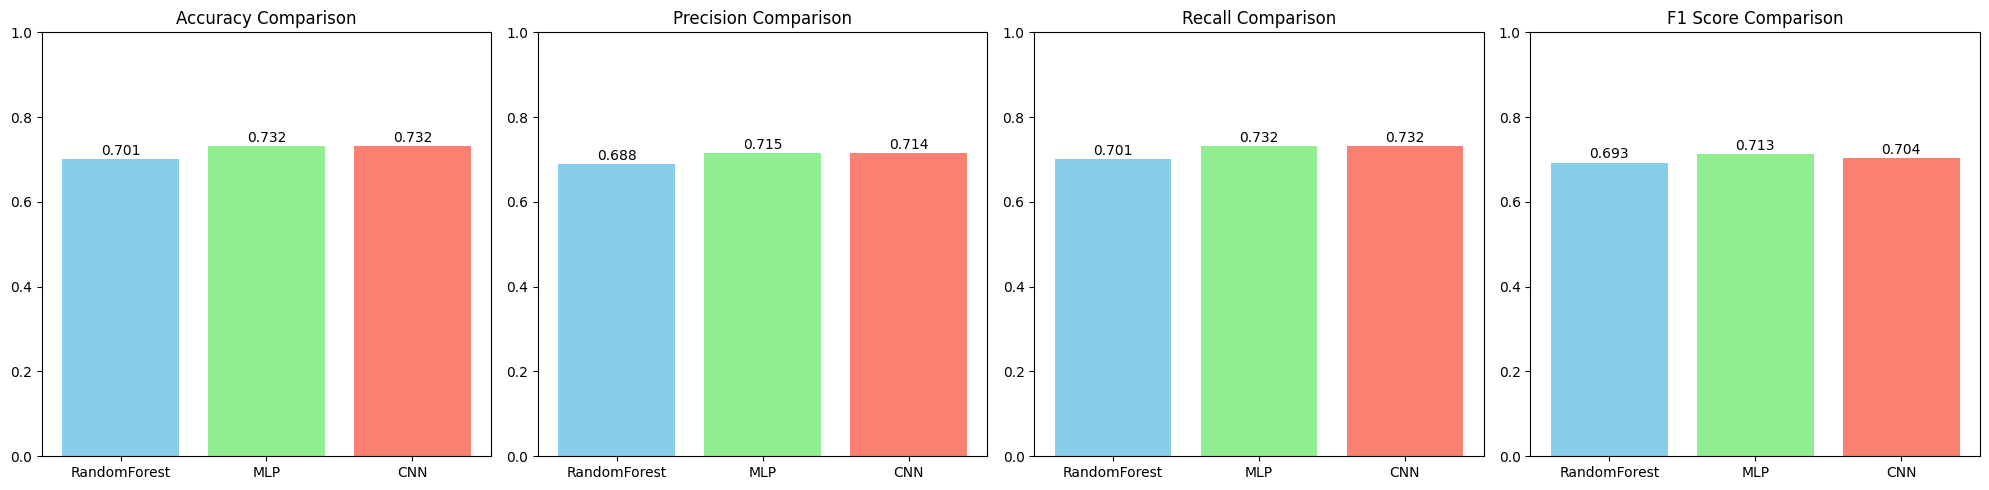

In [211]:
import matplotlib.pyplot as plt

# Function to plot a bar chart on a specific axis
def plot_metric(ax, metric_dict, metric_name):
    models = list(metric_dict.keys())
    values = list(metric_dict.values())

    ax.bar(models, values, color=['skyblue', 'lightgreen', 'salmon'])
    ax.set_ylim(0, 1)
    ax.set_title(f'{metric_name} Comparison', fontsize=12)

    # Add value labels on top of bars
    for i, v in enumerate(values):
        ax.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=10)

# Create subplots: 1 row, 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20,5))

# Plot each metric
plot_metric(axes[0], accuracy_, 'Accuracy')
plot_metric(axes[1], precision_value, 'Precision')
plot_metric(axes[2], recall_value, 'Recall')
plot_metric(axes[3], f1_value, 'F1 Score')

plt.tight_layout()
plt.show()


# Test Data

## CNN

### Model

In [213]:
y_pred_cnn_prob = cnn_model.predict(X_test_scaled)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype("int32")

accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_test, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')
roc_auc_cnn = roc_auc_score(y_test, y_pred_cnn_prob)

accuracy_['CNN'] = accuracy_cnn
precision_value['CNN'] = precision_cnn
recall_value['CNN'] = recall_cnn
f1_value['CNN'] = f1_cnn

# Print metrics
print("\n--- CNN Testing Results ---")
print(f"Accuracy: {accuracy_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall: {recall_cnn:.4f}")
print(f"F1 Score: {f1_cnn:.4f}")
print(f"ROC-AUC: {roc_auc_cnn:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cnn))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- CNN Testing Results ---
Accuracy: 0.7316
Precision: 0.7142
Recall: 0.7316
F1 Score: 0.7042
ROC-AUC: 0.7396

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.34      0.44      3127
           1       0.75      0.91      0.82      6873

    accuracy                           0.73     10000
   macro avg       0.69      0.63      0.63     10000
weighted avg       0.71      0.73      0.70     10000



### Confusion Matrix

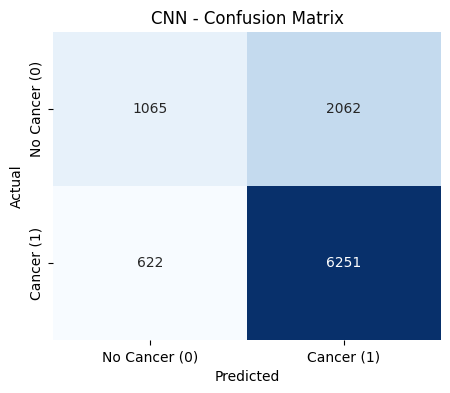

In [214]:
cnf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(5,4))
sns.heatmap(cnf_matrix_cnn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Cancer (0)", "Cancer (1)"],
            yticklabels=["No Cancer (0)", "Cancer (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN - Confusion Matrix")
plt.show()


## MLP

### Model

In [215]:
y_pred_mlp_prob = mlp_model.predict(X_test_scaled)
y_pred_mlp = (y_pred_mlp_prob > 0.5).astype("int32")

# Accuracy, Precision, Recall, F1
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp_prob)

# Store metrics in dictionaries (same as before)
accuracy_['MLP'] = accuracy_mlp
precision_value['MLP'] = precision_mlp
recall_value['MLP'] = recall_mlp
f1_value['MLP'] = f1_mlp

# Print metrics
print("\n--- MLP Testing Results ---")
print(f"Accuracy: {accuracy_mlp:.4f}")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")
print(f"F1 Score: {f1_mlp:.4f}")
print(f"ROC-AUC: {roc_auc_mlp:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

--- MLP Testing Results ---
Accuracy: 0.7321
Precision: 0.7153
Recall: 0.7321
F1 Score: 0.7131
ROC-AUC: 0.7566


### Confusio Matrix


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.39      0.48      3127
           1       0.76      0.89      0.82      6873

    accuracy                           0.73     10000
   macro avg       0.69      0.64      0.65     10000
weighted avg       0.72      0.73      0.71     10000



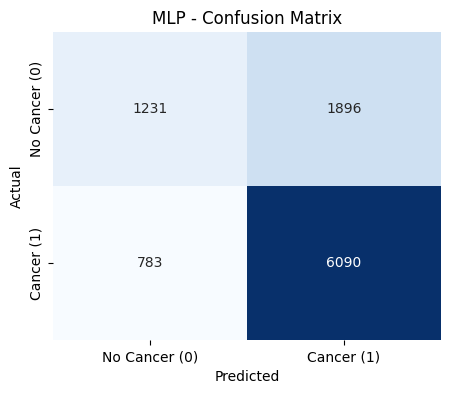

In [216]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
cnf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(5,4))
sns.heatmap(cnf_matrix_mlp, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Cancer (0)", "Cancer (1)"],
            yticklabels=["No Cancer (0)", "Cancer (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MLP - Confusion Matrix")
plt.show()


# Test With Your Data

In [219]:
feature_names = [
    "age",
    "gender (0=F, 1=M)",
    "pack_years (Pack per day * year of smoking)",
    "radon_exposure (3=High, 2=Medium, 1=Low)" ,
    "asbestos_exposure (1=Yes, 0=No)",
    "secondhand_smoke_exposure (1=Yes, 0=No)",
    "copd_diagnosis (1=Yes, 0=No)",
    "family_history (1=Yes, 0=No)"
]

user_input = []
print("Enter patient details to predict lung cancer risk:")
for feature in feature_names:
    value = float(input(f"{feature}: "))
    user_input.append(value)

user_input = np.array(user_input).reshape(1, -1)
print("\nUser input collected successfully:")

user_input_scaled = scaler.transform(user_input)

mlp_pred = (mlp_model.predict(user_input_scaled) > 0.5).astype("int32")[0][0]
mlp_prob = mlp_model.predict(user_input_scaled)[0][0]
print(f"\nMLP Prediction: {'Cancer' if mlp_pred==1 else 'No Cancer'} | Probability: {mlp_prob:.2f}")
print()

cnn_pred = (cnn_model.predict(user_input_scaled) > 0.5).astype("int32")[0][0]
cnn_prob = cnn_model.predict(user_input_scaled)[0][0]
print(f"CNN Prediction: {'Cancer' if cnn_pred==1 else 'No Cancer'} | Probability: {cnn_prob:.2f}")


Enter patient details to predict lung cancer risk:
age: 23
gender (0=F, 1=M): 0
pack_years (Pack per day * year of smoking): 3
radon_exposure (3=High, 2=Medium, 1=Low): 1
asbestos_exposure (1=Yes, 0=No): 0
secondhand_smoke_exposure (1=Yes, 0=No): 1
copd_diagnosis (1=Yes, 0=No): 0
family_history (1=Yes, 0=No): 1

User input collected successfully:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

MLP Prediction: No Cancer | Probability: 0.18

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1D CNN Prediction: No Cancer | Probability: 0.35
